# Importando o google drive para tabalhar com os dados direto do mesmo, ja que estão salvos lá.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Passo 1: Análise das Estatísticas Descritivas

In [319]:
import pandas as pd #importando a biblioteca do pandas para manipulação e análise dos dados
import matplotlib.pyplot as plt # importando uma biblioteca grafica para visualização dos dados
import seaborn as sns # importando outra biblioteca grafica para visualização dos dados
import numpy as np # importando a biblioteca NumPy para operações matematicas e estatisticas
import re # importando a biblioteca re para suporte a expressões regulares

# Carregando os dados de treinamento em um DataFrame
df_train = pd.read_csv('/content/drive/MyDrive/Bases de Dados/cars_train.csv', encoding="ISO-8859-1", sep=';')
df_train

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,elegivel_revisao,dono_aceita_troca,veiculo_nico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fbrica,revisoes_dentro_agenda,veiculo_alienado,preco
0,"3,01E+38",8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,False,NaN,NaN,Todas as revises feitas pela concessionria,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 7.473.259.008.373.930,00"
1,"2,80E+38",8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMçTICO,2017,2017.0,62979.0,Automtica,4,...,False,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,"R$ 8.196.533.263.377.470,00"
2,"5,64E+37",16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMçTICO,2018,2019.0,44070.0,Automtica,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 16.282.481.447.192,00"
3,"5,69E+37",14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automtica,4,...,False,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 12.368.135.885.695.500,00"
4,"3,39E+38",8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMçTICO,2013,2015.0,71491.0,Automtica,4,...,False,NaN,NaN,Todas as revises feitas pela concessionria,NaN,NaN,Garantia de fbrica,Todas as revises feitas pela agenda do carro,NaN,"R$ 824.197.638.908.304,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,"4,10E+37",8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMçTICO,2021,2021.0,8150.0,Automtica,4,...,False,Aceita troca,ònico dono,NaN,IPVA pago,Licenciado,Garantia de fbrica,NaN,NaN,"R$ 40.301.528.961.583.900,00"
29580,"1,65E+38",8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMçTICO,2020,2020.0,17987.0,Automtica,4,...,False,NaN,ònico dono,Todas as revises feitas pela concessionria,IPVA pago,Licenciado,Garantia de fbrica,NaN,NaN,"R$ 8.897.808.049.697.090,00"
29581,"1,71E+38",8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMçTICO,2019,2019.0,44742.0,Automtica,4,...,False,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 21.880.764.866.442.400,00"
29582,"2,09E+38",8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMçTICO,2021,2022.0,35376.0,Automtica,4,...,False,Aceita troca,ònico dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 6.849.599.069.317.160,00"


Visualisando as estatistica descritivas da base de dados, sendo elas a contagem, media, devio padrão, os valores minimos e maximos e os quartis

In [320]:
# Estatísticas descritivas
df_train.describe()

,num_fotos,ano_de_fabricacao,ano_modelo,hodometro,num_portas,veiculo_alienado
count,29407.000000,29584.000000,29584.000000,29584.000000,29584.000000,0.0
mean,10.323834,2016.758552,2017.808985,58430.592077,3.940677,NaN
std,3.487334,4.062422,2.673930,32561.769309,0.338360,NaN
min,8.000000,1985.000000,1997.000000,100.000000,2.000000,NaN
25%,8.000000,2015.000000,2016.000000,31214.000000,4.000000,NaN
50%,8.000000,2018.000000,2018.000000,57434.000000,4.000000,NaN
75%,14.000000,2019.000000,2020.000000,81953.500000,4.000000,NaN
max,21.000000,2022.000000,2023.000000,390065.000000,4.000000,NaN


Realizando a soma de todos dados nulos na base de dados

In [321]:
# Somando os dados nulos
df_train.isnull().sum()

id                             0
num_fotos                    177
marca                          0
modelo                         0
versao                         0
ano_de_fabricacao              0
ano_modelo                     0
hodometro                      0
cambio                         0
num_portas                     0
tipo                           0
blindado                       0
cor                            0
tipo_vendedor                  0
cidade_vendedor                0
estado_vendedor                0
anunciante                     0
entrega_delivery               0
troca                          0
elegivel_revisao               0
dono_aceita_troca           7662
veiculo_nico_dono         19161
revisoes_concessionaria    20412
ipva_pago                   9925
veiculo_licenciado         13678
garantia_de_fbrica        25219
revisoes_dentro_agenda     23674
veiculo_alienado           29584
preco                          0
dtype: int64

Realizando a limpesa e o tratamento dos dados para gerar um grafico de barras de distribuição de Preços mostrando o menor valor, tambem o maior valor e a media dos valores.

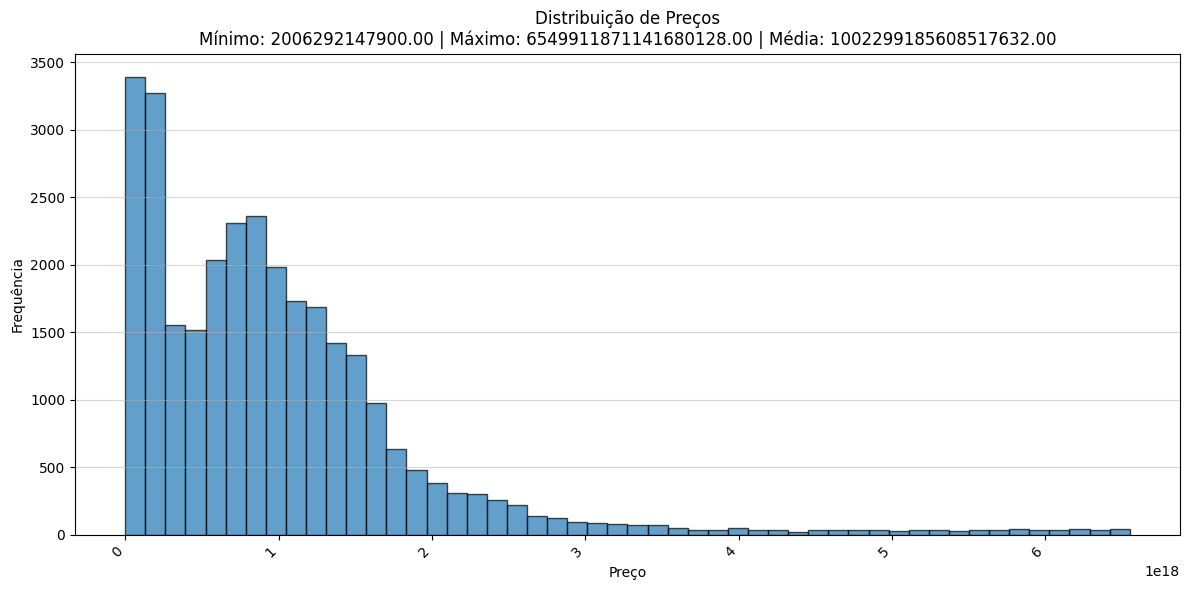

In [322]:
# Função para remover caracteres especiais e converter para float
def limpar_valor(valor):
    valor_limpo = re.sub('[^0-9]+', '', valor)  # Remove todos os caracteres não numéricos
    return float(valor_limpo)

# Limpando dos valores da coluna de preço
df_train['preco_limpo'] = df_train['preco'].apply(limpar_valor)

# Gerando a imagem com pyplot mostrando o valor Medio, Mínimo, Máximo dos preços.
plt.figure(figsize=(12, 6))
plt.hist(df_train['preco_limpo'], bins=50, edgecolor='black', alpha=0.7)
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.title('Distribuição de Preços\nMínimo: {:.2f} | Máximo: {:.2f} | Média: {:.2f}'.format(df_train['preco_limpo'].min(), df_train['preco_limpo'].max(), df_train['preco_limpo'].mean()))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y', alpha=0.5)
plt.show()


### Passo 2: Exploratory Data Analysis (Análise Exploratória de Dados)

### Hipóteses de negócio

Com os dados tratados estou criando a primeira hipótese analisando a media das frequencias de marcas por estado e mostrando na tela os resultados

In [323]:
# Hipótese 1: Marca de Carros que têm maior demanda por estados.

# Calculando a contagem das marcas para cada estado
frequencia_marcas_por_estado = df_train.groupby('estado_vendedor')['marca'].value_counts()

# Calculandor a média das frequências de marca por estado
media_frequencia_marcas = frequencia_marcas_por_estado.groupby('estado_vendedor').mean().sort_values(ascending=False)

# Exibindo os resultados
print(media_frequencia_marcas)


estado_vendedor
So Paulo (SP)              409.450000
Rio de Janeiro (RJ)          82.193548
Paran (PR)                  76.545455
Santa Catarina (SC)          74.258065
Minas Gerais (MG)            59.166667
Rio Grande do Sul (RS)       51.437500
Gois (GO)                   29.222222
Bahia (BA)                   23.230769
Pernambuco (PE)              12.720000
Paraba (PB)                  9.000000
Alagoas (AL)                  7.812500
Par (PA)                     7.400000
Rio Grande do Norte (RN)      6.428571
Cear (CE)                    5.307692
Amazonas (AM)                 5.100000
Mato Grosso (MT)              3.666667
Maranho (MA)                 3.500000
Tocantins (TO)                2.500000
Mato Grosso do Sul (MS)       2.500000
Sergipe (SE)                  2.400000
Esprito Santo (ES)           2.333333
Acre (AC)                     2.230769
Piau (PI)                    1.500000
Rondnia (RO)                 1.333333
Roraima (RR)                  1.000000
Name: mar

Aqui estou realizando novamente a contagem selecionando as marcas por estado agrupando em um formato tabular e mostrando um grafico da amstragem das marcas de carros por estado.


<ipython-input-325-138d68584282>:15: UserWarning: Glyph 135 (\x87) missing from current font.
  plt.tight_layout()
<ipython-input-325-138d68584282>:15: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
<ipython-input-325-138d68584282>:15: UserWarning: Glyph 139 (\x8b) missing from current font.
  plt.tight_layout()


<Figure size 1600x1200 with 0 Axes>

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


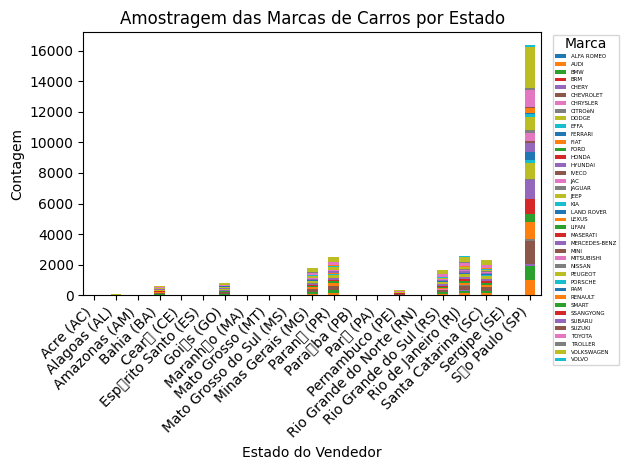

In [325]:
# Calculando a contagem das marcas por estado reorganizando os resultados do agrupamento em um formato tabular com unstack()
contagem_marcas_estados = df_train.groupby('estado_vendedor')['marca'].value_counts().unstack()

# Selecionando as marcas mais frequentes (top 10) por estado
marcas_top10_estados = contagem_marcas_estados.apply(lambda x: x.nlargest(10))

# Criando o gráfico de barras
plt.figure(figsize=(16, 12))  # Aumentar os valores de figsize para aumentar o tamanho do gráfico
marcas_top10_estados.plot(kind='bar', stacked=True)
plt.xlabel('Estado do Vendedor')
plt.ylabel('Contagem')
plt.title('Amostragem das Marcas de Carros por Estado')
plt.legend(title='Marca', bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=4)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();




Criando a segunda hipótese para descobrir a demandar de carros automaticos por estado, fazendo mais algusn tratamentos nos dados e gerando o grafico  

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 153 (\x99) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


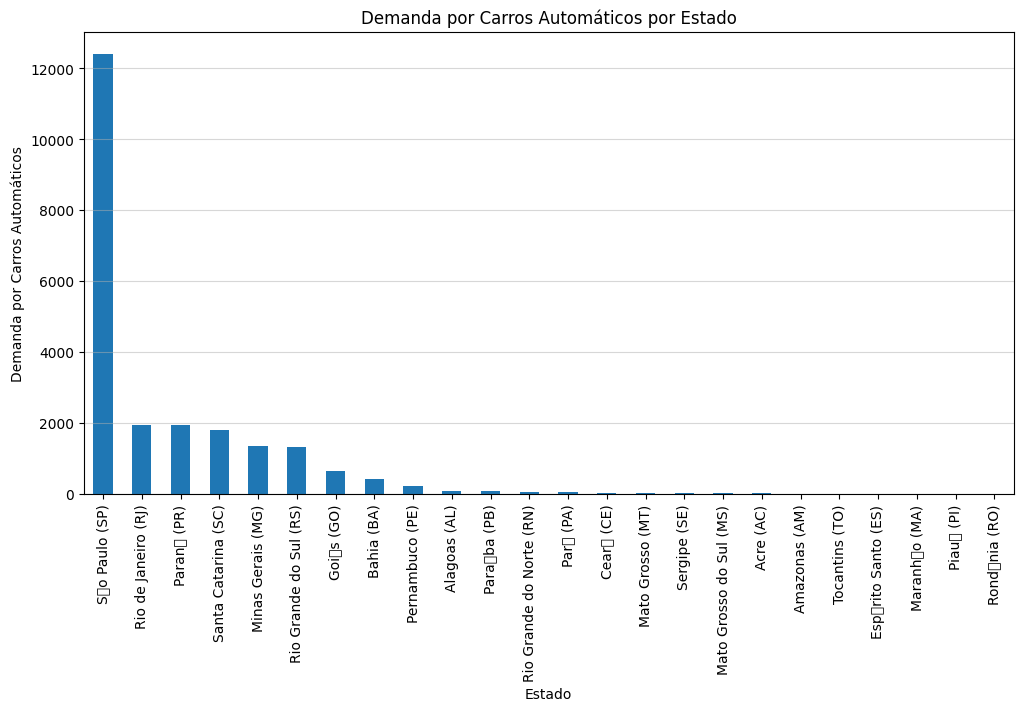

In [ ]:
# Hipótese 2: Estados com maior demanda por carros com transmissão automática.

# Substituindo a palavra "Autom‡tica" por "Automáticas" na coluna de "cambio"
df_train['cambio'] = df_train['cambio'].replace('Automtica', 'Automáticas')

# Filtrando os dados para incluir apenas carros com transmissão automática
df_carros_auto = df_train[df_train['cambio'] == 'Automáticas']


# Calculando a contagem de carros com transmissão automática por estado
carros_auto_estado = df_carros_auto['estado_vendedor'].value_counts()


# Gerando o gráfico de barras mostrando a demanda por carros com transmissão automática por estado
plt.figure(figsize=(12, 6))
carros_auto_estado.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Demanda por Carros Automáticos')
plt.title('Demanda por Carros Automáticos por Estado')
plt.grid(True, axis='y', alpha=0.5)
plt.show();


In [ ]:
df_train # verificando o dataframe com as transformações ja realizadas ate o momento

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,dono_aceita_troca,veiculo_nico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fbrica,revisoes_dentro_agenda,veiculo_alienado,preco,preco_limpo
0,"3,01E+38",8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,NaN,NaN,Todas as revises feitas pela concessionria,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 7.473.259.008.373.930,00",7.473259e+17
1,"2,80E+38",8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMçTICO,2017,2017.0,62979.0,Automáticas,4,...,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,"R$ 8.196.533.263.377.470,00",8.196533e+17
2,"5,64E+37",16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMçTICO,2018,2019.0,44070.0,Automáticas,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 16.282.481.447.192,00",1.628248e+15
3,"5,69E+37",14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automáticas,4,...,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 12.368.135.885.695.500,00",1.236814e+18
4,"3,39E+38",8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMçTICO,2013,2015.0,71491.0,Automáticas,4,...,NaN,NaN,Todas as revises feitas pela concessionria,NaN,NaN,Garantia de fbrica,Todas as revises feitas pela agenda do carro,NaN,"R$ 824.197.638.908.304,00",8.241976e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,"4,10E+37",8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMçTICO,2021,2021.0,8150.0,Automáticas,4,...,Aceita troca,ònico dono,NaN,IPVA pago,Licenciado,Garantia de fbrica,NaN,NaN,"R$ 40.301.528.961.583.900,00",4.030153e+18
29580,"1,65E+38",8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMçTICO,2020,2020.0,17987.0,Automáticas,4,...,NaN,ònico dono,Todas as revises feitas pela concessionria,IPVA pago,Licenciado,Garantia de fbrica,NaN,NaN,"R$ 8.897.808.049.697.090,00",8.897808e+17
29581,"1,71E+38",8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMçTICO,2019,2019.0,44742.0,Automáticas,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 21.880.764.866.442.400,00",2.188076e+18
29582,"2,09E+38",8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMçTICO,2021,2022.0,35376.0,Automáticas,4,...,Aceita troca,ònico dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 6.849.599.069.317.160,00",6.849599e+17


Criando a hipótese 3 aanalisnado os estados com maior interesse em carros com garantia. fazendo mais algumans taratamentos nos dados.

In [328]:
# Hipótese 3: Estados com maior interesse em comprar carros dentro da garantia de fábrica.

# Renomeando a coluna "garantia_de_fbrica" para "garantia_de_fabrica"
df_train = df_train.rename(columns={'garantia_de_fbrica': 'garantia_de_fabrica'})
print(df_train.columns)

# Substituindo o valor incorreto "Garantia_de_fbrica" por "Garantia_de_fabrica" na linha
df_train['garantia_de_fabrica'] = df_train['garantia_de_fabrica'].str.replace('Garantia de fbrica', 'Garantia_de_fabrica')

Index(['id', 'num_fotos', 'marca', 'modelo', 'versao', 'ano_de_fabricacao',
       'ano_modelo', 'hodometro', 'cambio', 'num_portas', 'tipo', 'blindado',
       'cor', 'tipo_vendedor', 'cidade_vendedor', 'estado_vendedor',
       'anunciante', 'entrega_delivery', 'troca', 'elegivel_revisao',
       'dono_aceita_troca', 'veiculo_nico_dono', 'revisoes_concessionaria',
       'ipva_pago', 'veiculo_licenciado', 'garantia_de_fabrica',
       'revisoes_dentro_agenda', 'veiculo_alienado', 'preco', 'preco_limpo'],
      dtype='object')


In [330]:
df_train # verificando o dataframe novamente depois das transformações

,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,dono_aceita_troca,veiculo_nico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fabrica,revisoes_dentro_agenda,veiculo_alienado,preco,preco_limpo
0,"3,01E+38",8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,NaN,NaN,Todas as revises feitas pela concessionria,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 7.473.259.008.373.930,00",7.473259e+17
1,"2,80E+38",8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMçTICO,2017,2017.0,62979.0,Automtica,4,...,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,"R$ 8.196.533.263.377.470,00",8.196533e+17
2,"5,64E+37",16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMçTICO,2018,2019.0,44070.0,Automtica,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 16.282.481.447.192,00",1.628248e+15
3,"5,69E+37",14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automtica,4,...,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 12.368.135.885.695.500,00",1.236814e+18
4,"3,39E+38",8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMçTICO,2013,2015.0,71491.0,Automtica,4,...,NaN,NaN,Todas as revises feitas pela concessionria,NaN,NaN,Garantia_de_fabrica,Todas as revises feitas pela agenda do carro,NaN,"R$ 824.197.638.908.304,00",8.241976e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,"4,10E+37",8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMçTICO,2021,2021.0,8150.0,Automtica,4,...,Aceita troca,ònico dono,NaN,IPVA pago,Licenciado,Garantia_de_fabrica,NaN,NaN,"R$ 40.301.528.961.583.900,00",4.030153e+18
29580,"1,65E+38",8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMçTICO,2020,2020.0,17987.0,Automtica,4,...,NaN,ònico dono,Todas as revises feitas pela concessionria,IPVA pago,Licenciado,Garantia_de_fabrica,NaN,NaN,"R$ 8.897.808.049.697.090,00",8.897808e+17
29581,"1,71E+38",8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMçTICO,2019,2019.0,44742.0,Automtica,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 21.880.764.866.442.400,00",2.188076e+18
29582,"2,09E+38",8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMçTICO,2021,2022.0,35376.0,Automtica,4,...,Aceita troca,ònico dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 6.849.599.069.317.160,00",6.849599e+17


In [ ]:
# Filtrando os dados para incluir apenas carros com garantia de fábrica, agrupa os dados por estado e calcula a média do preço para cada estado
df_train = df_train[df_train['garantia_de_fabrica'] == 'Garantia_de_fabrica']
media_renda_estado = df_train.groupby('estado_vendedor')['preco_limpo'].mean().sort_values(ascending=False)

In [ ]:
media_renda_estado

estado_vendedor
Tocantins (TO)              2.430022e+18
Acre (AC)                   1.504169e+18
Sergipe (SE)                1.259448e+18
Par (PA)                   1.214240e+18
Mato Grosso do Sul (MS)     1.142514e+18
Bahia (BA)                  1.126614e+18
Santa Catarina (SC)         1.113455e+18
Paran (PR)                 1.111073e+18
Rio Grande do Sul (RS)      1.097969e+18
So Paulo (SP)              1.026882e+18
Gois (GO)                  1.011223e+18
Mato Grosso (MT)            1.002860e+18
Rio de Janeiro (RJ)         1.000092e+18
Paraba (PB)                9.576275e+17
Minas Gerais (MG)           9.178086e+17
Rio Grande do Norte (RN)    8.834099e+17
Alagoas (AL)                8.402962e+17
Pernambuco (PE)             7.695018e+17
Amazonas (AM)               7.548556e+17
Esprito Santo (ES)         6.796960e+17
Cear (CE)                  1.239399e+17
Name: preco_limpo, dtype: float64

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 135 (\x87) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 139 (\x8b) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


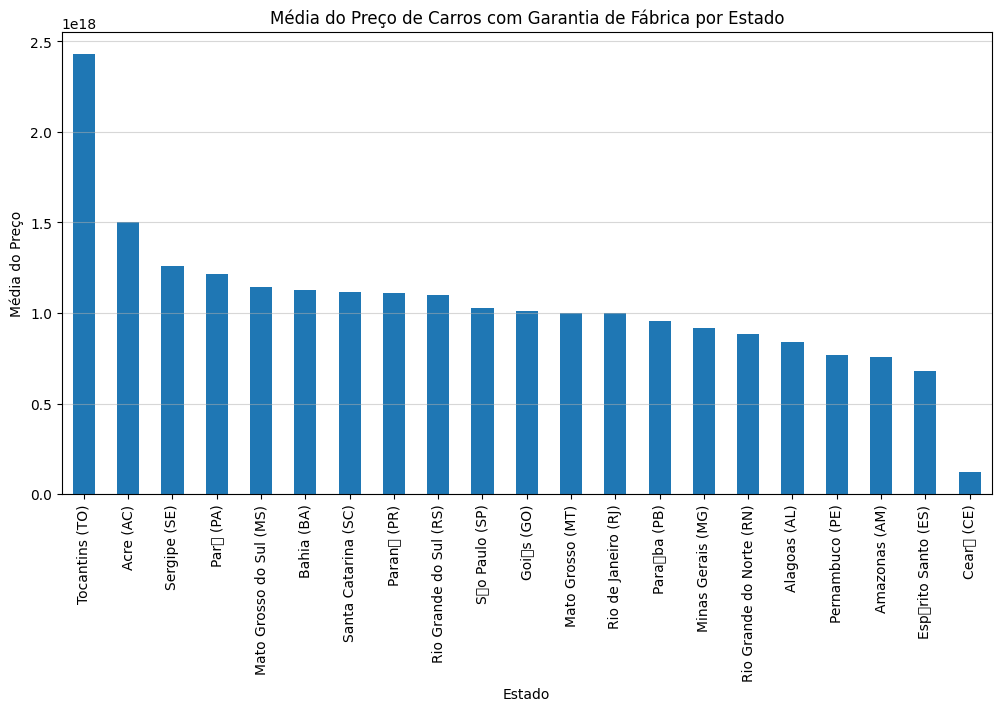

In [ ]:
# Criando o gráfico de barras
plt.figure(figsize=(12, 6))
media_renda_estado.plot(kind='bar')
plt.xlabel('Estado')
plt.ylabel('Média do Preço')
plt.title('Média do Preço de Carros com Garantia de Fábrica por Estado')
plt.grid(True, axis='y', alpha=0.5)
plt.show()


### Perguntas de negócio

In [ ]:
# Qual é o melhor estado cadastrado na base de dados para vender um carro de marca popular e por quê?

# Definindo as marcas populares
marcas_populares = ['VOLKSWAGEN', 'CHEVROLET', 'FIAT', 'FORD', 'RENAULT', 'PEUGEOT']

# Filtrando os carros de marcas populares
carros_populares = df_train[df_train['marca'].isin(marcas_populares)]

# Contando a frequência de cada estado
frequencia_estado = carros_populares['estado_vendedor'].value_counts()

# Selecionando o estado com a maior contagem
melhor_estado = frequencia_estado.idxmax()

print("O melhor estado cadastrado para vender um carro de marca popular é:", melhor_estado)


O melhor estado cadastrado para vender um carro de marca popular é: So Paulo (SP)


In [ ]:
# Com base na demanda o Melhor estado é São paulo.

In [ ]:
# Calculando a média do preço por estado
media_preco_estado = carros_populares.groupby('estado_vendedor')['preco_limpo'].mean()

# Selecionando o estado com a menor média de preço
melhor_estado_preco = media_preco_estado.idxmin()

print("O melhor estado cadastrado para vender um carro de marca popular com base no preço médio é:", melhor_estado_preco)


O melhor estado cadastrado para vender um carro de marca popular com base no preço médio é: Cear (CE)


In [ ]:
# Com base no preço médio o melhor estado é o Ceará.

In [ ]:
# Qual é o melhor estado para comprar uma picape com transmissão automática e por quê?

# Filtrando as Picapes por estado, contando os valores e selecionando o estado com maior contagem
pic_automatica_estado = df_train[df_train['tipo'] == 'Picape']['estado_vendedor'].value_counts().idxmax()

print("O melhor estado para comprar uma picape com transmissão automática baseado na demanda é:", pic_automatica_estado)


O melhor estado para comprar uma picape com transmissão automática baseado na demanda é: So Paulo (SP)


In [ ]:
# O melhor estado para comprar uma picape automática com base na demanda é São Paulo.

In [ ]:
# Filtrando as Picapes por estado,calculando a media dos preços e selecionando o estado com estado com a menor média de preço

pic_automatica_estado = df_train[df_train['tipo'] == 'Picape'].groupby('estado_vendedor')['preco_limpo'].mean().idxmin()

print("O melhor estado para comprar uma picape com transmissão automática com base no preço médio é:", pic_automatica_estado)


O melhor estado para comprar uma picape com transmissão automática com base no preço médio é: Esprito Santo (ES)


In [ ]:
# O melhor estado para comprar uma picape automática com base no preço médio é o Espirito Santo.

In [ ]:
# Qual é o melhor estado para comprar carros que ainda estejam dentro da garantia de fábrica e por quê?

# Filtrando os carros com garantia de fábrica
carros_garantia_fabrica = df_train[df_train['garantia_de_fabrica'] == 'Garantia_de_fabrica']

# Calculando a contagem de carros com garantia de fábrica por estado
contagem_estado = carros_garantia_fabrica['estado_vendedor'].value_counts()

# Selecionando o estado com a maior contagem
melhor_estado = contagem_estado.idxmax()

print("O melhor estado para comprar carros com garantia de fábrica na demanda é:", melhor_estado)


O melhor estado para comprar carros com garantia de fábrica na demanda é: So Paulo (SP)


In [ ]:
# O melhor estado para comprar carros com garantia de fábrica baseado na demanda é São Paulo.

In [ ]:
# Calculando a média dos preços dos carros com garantia de fábrica por estado
media_preco_estado = carros_garantia_fabrica.groupby('estado_vendedor')['preco_limpo'].mean()

# Selecionando o estado com o menor preço médio
melhor_estado = media_preco_estado.idxmin()

print("O melhor estado para comprar carros com garantia de fábrica com base no preço médio é:", melhor_estado)



O melhor estado para comprar carros com garantia de fábrica com base no preço médio é: Cear (CE)


In [ ]:
# O melhor estado para comprar carros com garantia de fábrica com base no preço médio é o Ceará.

In [331]:
df_train # dando uma ultima olhada para saber como ficou o data frame antes de fazer a previsão


,id,num_fotos,marca,modelo,versao,ano_de_fabricacao,ano_modelo,hodometro,cambio,num_portas,...,dono_aceita_troca,veiculo_nico_dono,revisoes_concessionaria,ipva_pago,veiculo_licenciado,garantia_de_fabrica,revisoes_dentro_agenda,veiculo_alienado,preco,preco_limpo
0,"3,01E+38",8.0,NISSAN,KICKS,1.6 16V FLEXSTART SL 4P XTRONIC,2017,2017.0,67772.0,CVT,4,...,NaN,NaN,Todas as revises feitas pela concessionria,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 7.473.259.008.373.930,00",7.473259e+17
1,"2,80E+38",8.0,JEEP,COMPASS,2.0 16V FLEX LIMITED AUTOMçTICO,2017,2017.0,62979.0,Automtica,4,...,Aceita troca,NaN,NaN,IPVA pago,NaN,NaN,NaN,NaN,"R$ 8.196.533.263.377.470,00",8.196533e+17
2,"5,64E+37",16.0,KIA,SORENTO,2.4 16V GASOLINA EX 7L AWD AUTOMçTICO,2018,2019.0,44070.0,Automtica,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 16.282.481.447.192,00",1.628248e+15
3,"5,69E+37",14.0,VOLKSWAGEN,AMAROK,2.0 HIGHLINE 4X4 CD 16V TURBO INTERCOOLER DIES...,2013,2015.0,85357.0,Automtica,4,...,Aceita troca,NaN,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 12.368.135.885.695.500,00",1.236814e+18
4,"3,39E+38",8.0,SSANGYONG,KORANDO,2.0 GLS 4X4 16V TURBO DIESEL 4P AUTOMçTICO,2013,2015.0,71491.0,Automtica,4,...,NaN,NaN,Todas as revises feitas pela concessionria,NaN,NaN,Garantia_de_fabrica,Todas as revises feitas pela agenda do carro,NaN,"R$ 824.197.638.908.304,00",8.241976e+16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29579,"4,10E+37",8.0,TOYOTA,HILUX,2.8 D-4D TURBO DIESEL CD SRX 4X4 AUTOMçTICO,2021,2021.0,8150.0,Automtica,4,...,Aceita troca,ònico dono,NaN,IPVA pago,Licenciado,Garantia_de_fabrica,NaN,NaN,"R$ 40.301.528.961.583.900,00",4.030153e+18
29580,"1,65E+38",8.0,VOLKSWAGEN,POLO,1.0 200 TSI HIGHLINE AUTOMçTICO,2020,2020.0,17987.0,Automtica,4,...,NaN,ònico dono,Todas as revises feitas pela concessionria,IPVA pago,Licenciado,Garantia_de_fabrica,NaN,NaN,"R$ 8.897.808.049.697.090,00",8.897808e+17
29581,"1,71E+38",8.0,TOYOTA,HILUX,2.8 SRX 4X4 CD 16V DIESEL 4P AUTOMçTICO,2019,2019.0,44742.0,Automtica,4,...,Aceita troca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"R$ 21.880.764.866.442.400,00",2.188076e+18
29582,"2,09E+38",8.0,PEUGEOT,2008,1.6 16V FLEX ALLURE PACK 4P AUTOMçTICO,2021,2022.0,35376.0,Automtica,4,...,Aceita troca,ònico dono,NaN,IPVA pago,Licenciado,NaN,NaN,NaN,"R$ 6.849.599.069.317.160,00",6.849599e+17


### Passo 3: Previsão de Preço

## Antes de tudo Vale resaltar que consegui realizar o processo a seguir com muitos erros e aprendendo como corrigilos e acertando o codigo até ter o resultado final.

O código a seguir realiza algumas etapas para treinar o modelo de regressão linear e avaliar seu desempenho usando o erro quadrático médio.

Primeiro são importadas as classes e funções necessárias do scikit-learn (sklearn) para realizar a regressão linear, dividindo os dados em conjuntos de treinamento e teste, e tambem calcular o MSE e realizar a codificação de variáveis categóricas.

Eu não conhecia mas depois de varios erros utilizei one-hot: A coluna 'marca' é codificada utilizando a função get_dummies() do pandas, que realiza a codificação one-hot, gerando colunas binárias para cada valor único da coluna em questão. Com isso cada valor único é representado como uma coluna binária, sendo 1 se a observação pertencer a essa categoria e 0 caso contrário. O DataFrame resultante é armazenado em df_train_encoded.

Foi realizada a codificação da variável alvo 'preco_limpo' usando a classe LabelEncoder() do scikit-learn. Essa classe converte valores categóricos em valores numéricos, atribuindo um número único a cada categoria presente na variável alvo. Os valores numéricos resultantes são substituídos na coluna 'preco_limpo' em df_train_encoded.

São realizadas codificações one-hot nas colunas 'modelo', 'versao' e 'cambio', também utilizando a função get_dummies(). como explicado a cima se cria colunas binárias para cada valor único nessas colunas, expandindo assim a representação dos dados categóricos.

Algumas colunas numéricas, especificamente 'ano_de_fabricacao', 'hodometro' e 'num_portas', têm vírgulas em vez de pontos como separadores decimais. Desse modo as vírgulas foram substituídas por pontos e os valores foram convertidos para o tipo float.

Depois o dataframe df_train_encoded foi selecionado para incluir apenas as colunas relevantes para o modelo de regressão linear. As colunas selecionadas são 'ano_de_fabricacao', 'hodometro', 'num_portas' e 'preco_limpo'.

Foi realizado o tratamento de valores faltantes, desse modo as linhas com valores faltantes são removidas do DataFrame df_train_encoded usando o método dropna().

Em seguida foram divididos os dados, o conjunto de dados é dividido em variáveis de entrada (X) e a variável alvo (y) usando os métodos drop() e values do pandas.

logo depois foi realizado a divisão em conjunto de treinamento e teste, o conjunto de dados é dividido em conjuntos de treinamento e teste, onde 80% dos dados são usados para treinar o modelo (X_train, y_train) e 20% são usados para testar o modelo (X_test, y_test). O parâmetro test_size=0.2 indica que 20% dos dados serão usados para teste.

Foi criado um objeto da classe LinearRegression() do scikit-learn que é um modelo de regressão linear. Em seguida, o método fit() é chamado para ajustar o modelo aos dados de treinamento (X_train, y_train).

Usando o modelo treinado, são feitas previsões para as variáveis de entrada do conjunto de teste (X_test) usando o método predict().

Por ultimo é avaliado o desempenho com o erro quadrático médio (MSE), com isso é calculado realizando a comparação das previsões (y_pred) com os valores verdadeiros do conjunto de teste (y_test) usando a função mean_squared_error() do scikit-learn. O resultado é armazenado na variável mse e depois impresso.


Esse código completo realiza todo o processo de treinamento de um modelo de regressão linear, desde a preparação dos dados até a avaliação do desempenho do modelo usando o MSE.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Realizando a codificação one-hot na coluna 'marca'
df_train_encoded = pd.get_dummies(df_train, columns=['marca'])

# Codificando a variável alvo 'preco_limpo'
label_encoder = LabelEncoder()
df_train_encoded['preco_limpo'] = label_encoder.fit_transform(df_train_encoded['preco_limpo'])

# Realizando a codificação one-hot nas colunas categóricas
df_train_encoded = pd.get_dummies(df_train_encoded, columns=['modelo', 'versao', 'cambio'])

# Substituindo as vírgulas por pontos nas colunas numéricas
numeric_cols = ['ano_de_fabricacao', 'hodometro', 'num_portas']
for col in numeric_cols:
    df_train_encoded[col] = df_train_encoded[col].replace(',', '.').astype(float)

# Selecionando as variáveis relevantes
features = ['ano_de_fabricacao', 'hodometro', 'num_portas']
df_train_encoded = df_train_encoded[features + ['preco_limpo']]

# Tratando valores faltantes
df_train_encoded = df_train_encoded.dropna()

# Dividindo os dados em variáveis de entrada (X) e variável alvo (y)
X = df_train_encoded.drop('preco_limpo', axis=1)
y = df_train_encoded['preco_limpo']

# Dividindo os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliando o desempenho do modelo usando o erro quadrático médio (MSE)
mse = mean_squared_error(y_test, y_pred)

print('Erro quadrático médio (MSE):', mse)


Erro quadrático médio (MSE): 1539636.235803595


In [ ]:
df_train_encoded # verificando os dados ao final

,ano_de_fabricacao,hodometro,num_portas,preco_limpo
4,2013.0,71491.0,4.0,226
8,2017.0,39987.0,4.0,1856
17,2019.0,35346.0,4.0,1603
19,2021.0,7277.0,4.0,3258
21,2020.0,8220.0,4.0,156
...,...,...,...,...
29564,2021.0,21166.0,4.0,852
29566,2021.0,2596.0,4.0,2166
29567,2019.0,31095.0,4.0,1631
29579,2021.0,8150.0,4.0,4324


### Passo 4: Resultado Final

Carregando os dados de teste, selecionando as colulas relevantes e em seguida fazendo as previsões e salvando em um novo dataframe para esporta-lo para um arquivo CSV.

In [ ]:
# Carregando os dados de teste em um DataFrame
df_test = pd.read_csv('/content/drive/MyDrive/Bases de Dados/cars_test.csv', encoding="utf-16", sep='\t')

# Selecionando apenas as colunas relevantes do conjunto de teste
X_test = df_test[features]

# Fazendo previsões no conjunto de teste
predicted_prices = model.predict(X_test)

# Criando um DataFrame com as colunas 'id' e 'preco' das previsões
df_predictions = pd.DataFrame({'id': df_test['id'], 'preco': predicted_prices})

# Salvando as previsões em um arquivo CSV
df_predictions.to_csv('/content/drive/MyDrive/Bases de Dados/predicted.csv', index=False)


Carregando o arquivo gerado e visualisando o resultado.

In [ ]:
arquivo_final = pd.read_csv('/content/drive/MyDrive/Bases de Dados/predicted.csv')
arquivo_final

,id,preco
0,13518783164498355150900635905895481162,2186.102107
1,299896161723793383246777788797566040330,2111.637217
2,316180649972302128246133616457018378621,2153.055951
3,222527157104148385909188217274642813298,2171.150741
4,160460343059850745858546502614838368036,2095.450228
...,...,...
9857,270530958308663978454359593206239054667,2124.956633
9858,35444226755331218706378362485070904721,2126.234717
9859,151927592621490440610866139377092833936,2180.686240
9860,118047837484645467440786911677256539035,2109.030324
